In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
train_df.head(18)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
train_df.shape

(7613, 5)

In [6]:
train_df = train_df.drop_duplicates("text",keep="last")
train_df.shape

(7503, 5)

In [7]:
train_df["target"].value_counts()

target
0    4307
1    3196
Name: count, dtype: int64

Unique keywords num=222
Unique keywords num=222


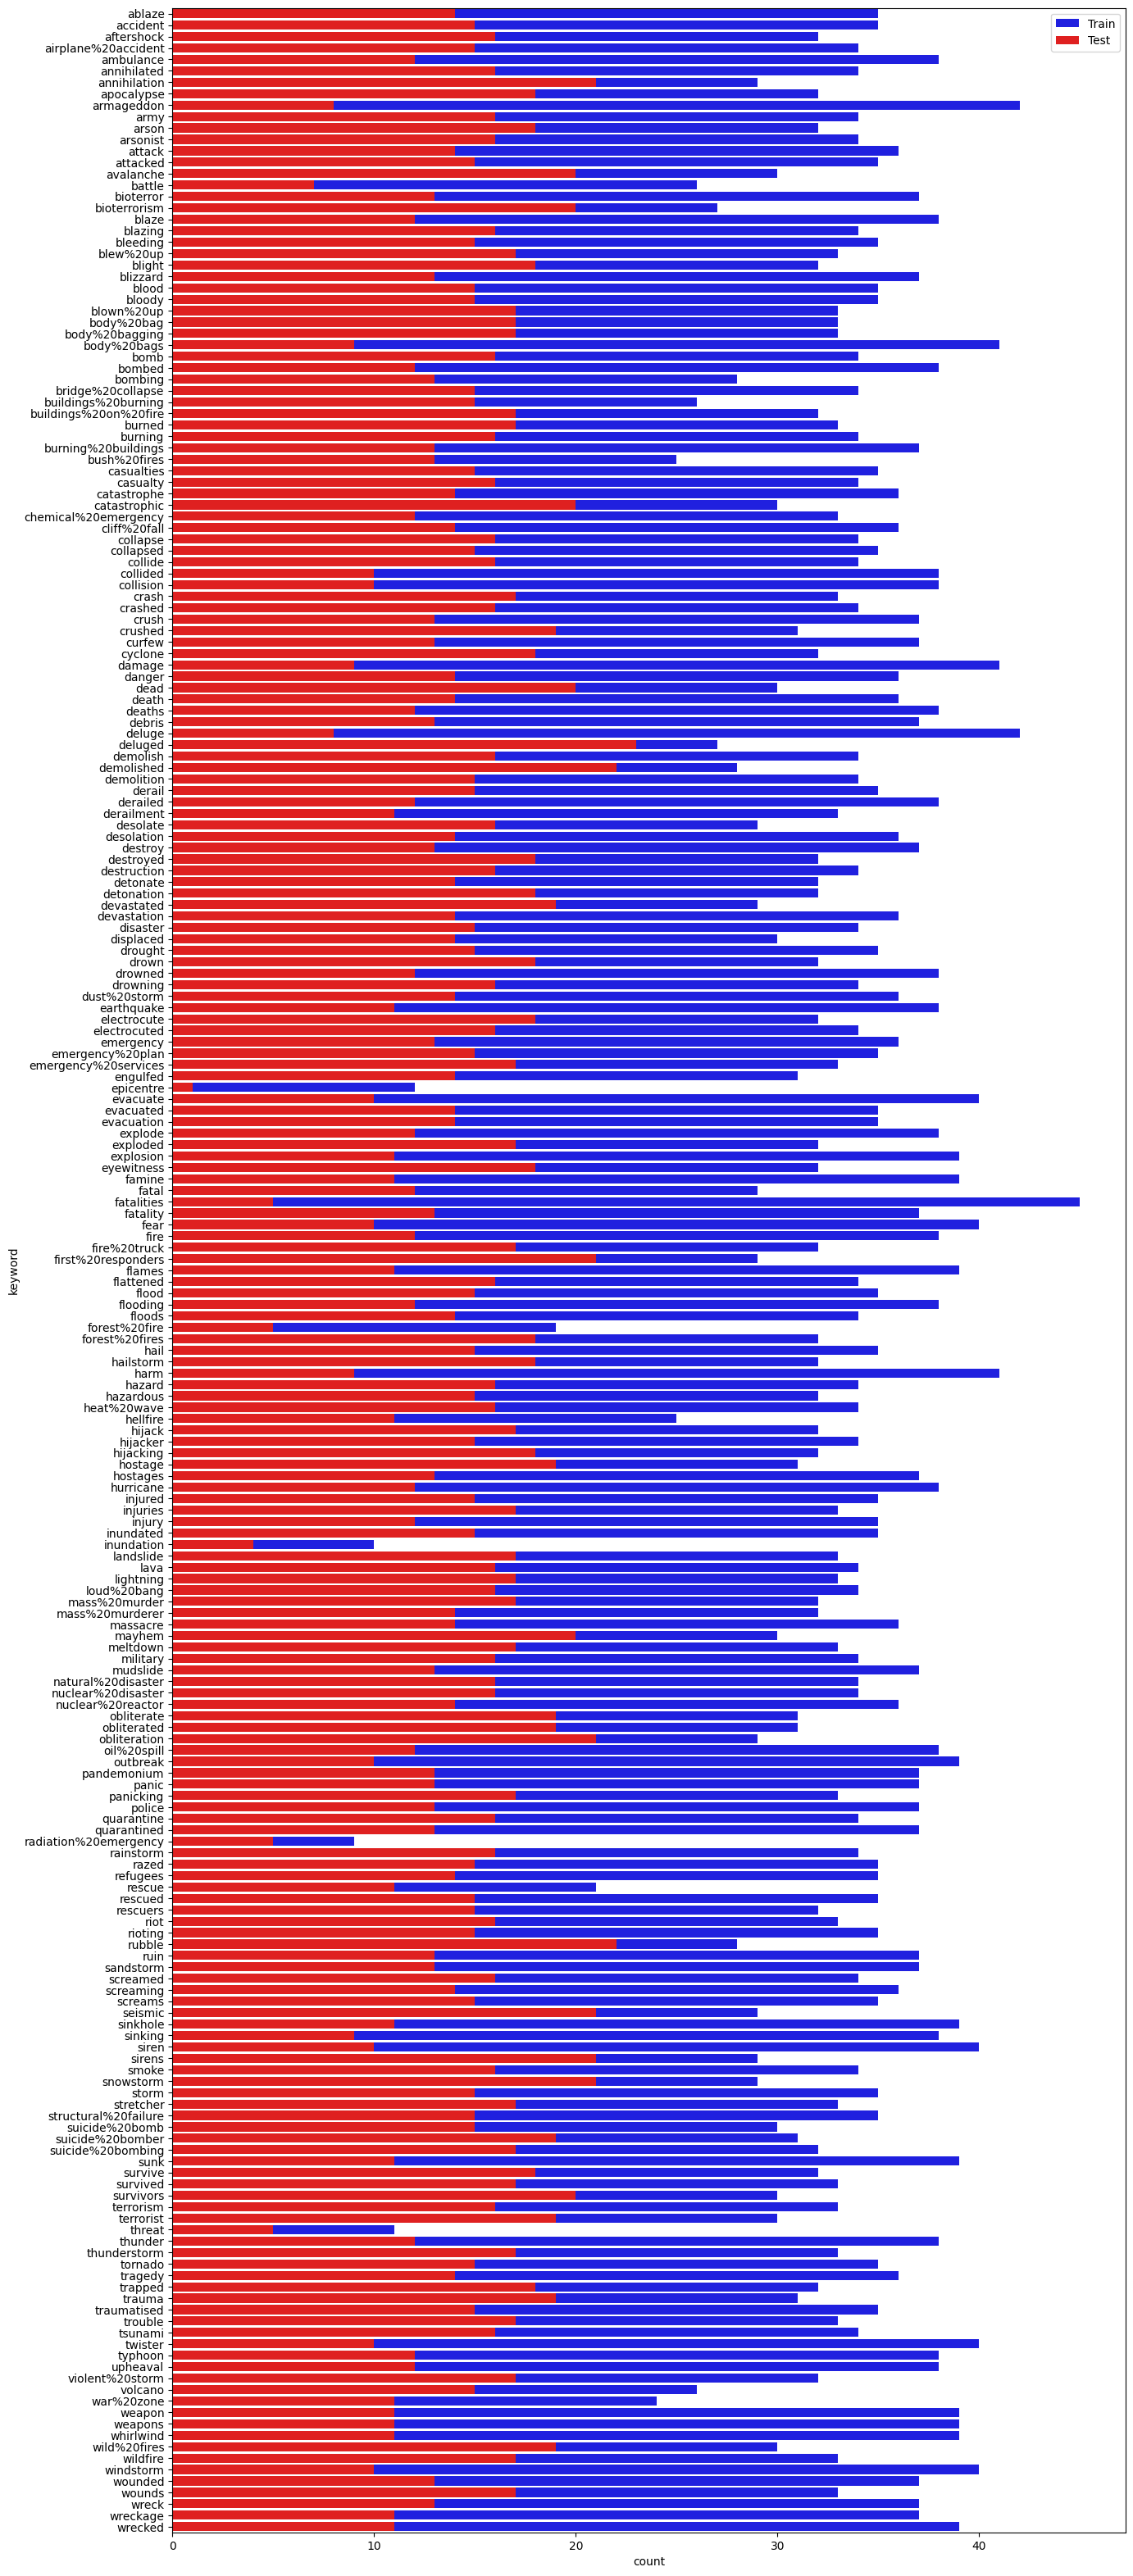

In [8]:
plt.figure(figsize=(15,40))
print(f'Unique keywords num={len(train_df.keyword.unique())}')
print(f'Unique keywords num={len(test_df.keyword.unique())}')
sns.countplot(y=train_df['keyword'], color=(0,0,1), label='Train')
sns.countplot(y=test_df['keyword'], color=(1,0,0), label='Test')
plt.legend()

<Axes: xlabel='count', ylabel='keyword'>

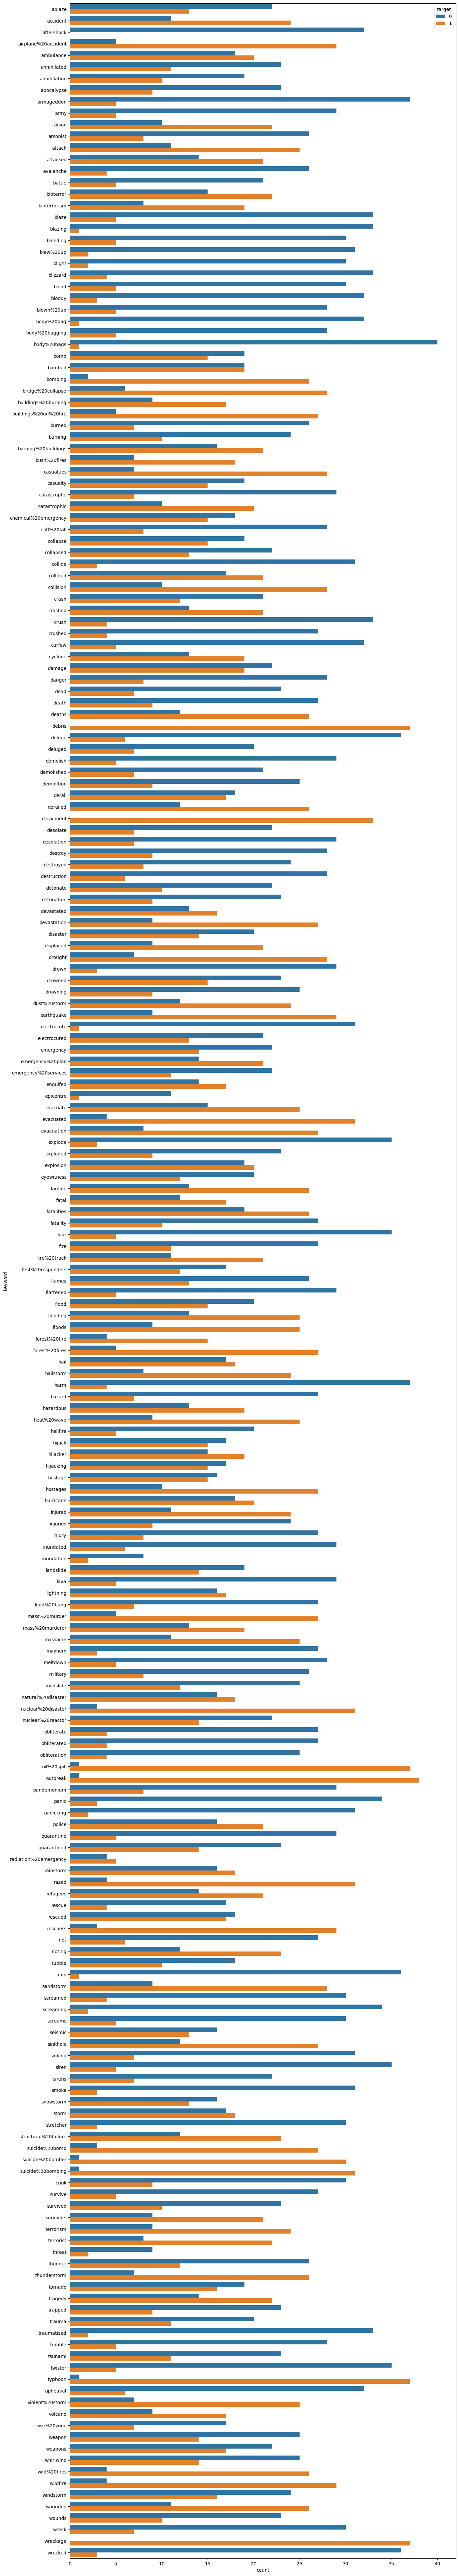

In [9]:
plt.figure(figsize=(15,100))
sns.countplot(data=train_df,y="keyword",hue="target")

In [10]:
#import tensorflow as tf
#import tensorflow_hub as hub
#import tensorflow_text as text
#from official.nlp import optimization

In [11]:
#!pip install -q tf-models-official==2.3.0

In [12]:
train_df.isna()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


<Axes: >

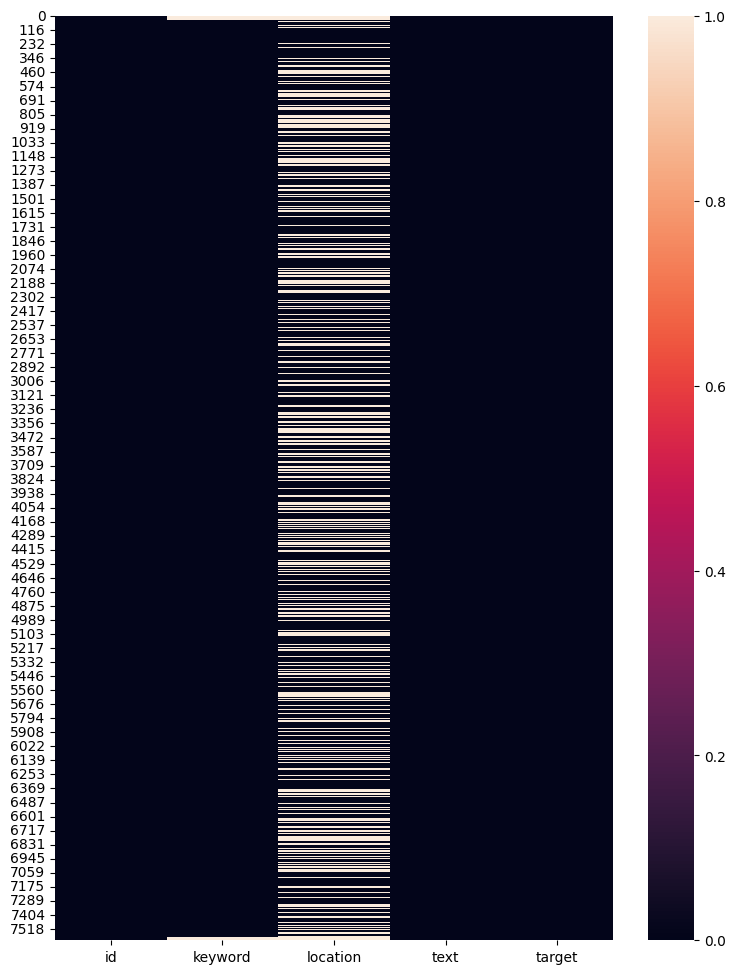

In [13]:
plt.figure(figsize=(9,12))
sns.heatmap(train_df.isna())

In [14]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [15]:
train_df[train_df["target"] == 1]["text"].values[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [16]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [17]:
count_vectorizer = feature_extraction.text.CountVectorizer()

## let's get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train_df["text"][0:5])

In [18]:
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [19]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])

## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test_df["text"])

In [20]:
train_vectors.shape

(7503, 21637)

In [21]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()

In [22]:
count_vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'ûónegligence', 'ûótech', 'ûówe'],
      dtype=object)

In [23]:
print(count_vectorizer.get_feature_names_out().shape)

(21637,)


In [24]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()

In [25]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.58901099, 0.56152687, 0.64346096])

In [26]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier()

In [27]:
sample_submission = pd.read_csv("./sample_submission.csv")

In [28]:
sample_submission["target"] = clf.predict(test_vectors)

In [29]:
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [30]:
sample_submission.to_csv("submission.csv", index=False)

In [ ]:
clf.predict()

In [31]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [65]:
#my_tweet = (0,pd.NaN,pd.NaN,"An avion crash on night city")
#tweet_text = "Major crash on the highway today caused significant delays. Remember to stay safe and always keep your eyes on the road. 🙏🚗💥 #StaySafe #DriveCarefully #RoadSafety "
tweet_text = "Icy roads lead to multiple crashes today. Please drive slowly and keep a safe distance from other vehicles. ❄️🚗 #WinterDriving #SafetyFirst"
tweet_text_vectors = count_vectorizer.transform([tweet_text])
tweet_text_vectors


<1x21637 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [66]:
prediction = clf.predict(tweet_text_vectors)
print(f'[{prediction[0]}]accident : {"yes" if prediction[0] == 1 else "no"}')

[1]accident : yes
